# Video Streams
## Computer Vision and Image Processing - Lab Session 5 - Exercises
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Pierluigi Zama Ramirez, pierluigi.zama@unibo.it - Riccardo Spezialetti, riccardo.spezialetti@unibo.it

## Exercise 0: Distance Functions between images

Define three functions to calculate the $L_1$, $L_2$ and $L_{\infty}$ distances between two images.

In [7]:
# Write your solution here
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output

def get_img_difference(img1, img2, p):
    if img1.shape[-1]==3 and len(img1.shape)==3:
        RGB = True
    else:
        RGB = False

    if p==1:
        diff = np.abs(img1-img2)
        if RGB:
            diff = np.sum(diff, axis=-1)

    elif p==2:
        diff = (img1-img2)**2
        if RGB:
            diff = np.sum(diff, axis=-1)
        diff = np.sqrt(diff)
    
    elif p==np.inf:
        diff = np.abs(img1-img2)
        if RGB:
            diff = np.max(diff, axis=-1)
    
    else:
        raise NotImplementedError("The value {} is not an accepted distance: accepted distances are {1, 2, np.inf}".format(p))

    return diff


## Exercise 1: Two Frame Difference

Calculate a Two Frame Difference over frames of a video to detect motion changes. Try different distance functions and visualize results. Test it on "ex/1.avi".

Released Video Resource


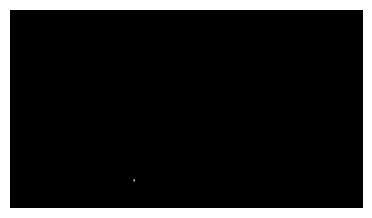

In [33]:
# Write your solution here
# Put the code in try-except statements catch the keyboard exception and release the camera device and 
# continue with the rest of code.

def display_mask_and_change_image(mask, img):
    img_copy = img.copy()
    img_copy[np.logical_not(mask)] = np.asarray([255,255,255])

    mask = np.uint8(mask)*255

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(mask, cmap='gray', vmin=0, vmax=255)

    plt.subplot(1,2,2)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_copy.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.show()


def two_frame_difference_mask(img1, img2, distance, threshold):
    diff_img = get_img_difference(img1, img2, distance)
    mask = diff_img > threshold
    return mask


def play_mask_and_image_two_frames(video_path, distance, threshold):
    cap = cv2.VideoCapture(video_path)
    idx = 0
    try:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret and not frame is None:
                if idx == 0:
                    previous_frame = np.float32(frame)
                else:
                    current_frame = np.float32(frame)
                    mask = two_frame_difference_mask(current_frame, previous_frame, distance, threshold)
                    display_mask_and_change_image(mask, frame)
                    clear_output(wait=True)
                    previous_frame = current_frame
                idx += 1

    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")

play_mask_and_image_two_frames('LabSession5Images/video.avi', distance=np.inf, threshold=10)

## Exercise 2: Three Frame Difference

Calculate a Three Frame Difference over frames of a video to detect motion changes. Try different distance functions and visualize results. Test it on "ex/1.avi".

In [34]:
# Write your solution here
def three_frame_difference_mask(img1, img2, img3, distance, threshold):
    mask_1 = two_frame_difference_mask(img1, img2, distance, threshold)
    mask_2 = two_frame_difference_mask(img2, img3, distance, threshold)
    return np.logical_and(mask_1,mask_2)

def play_mask_and_image_three_frames(video_path, distance, threshold):
    cap = cv2.VideoCapture(video_path)
    idx = 0
    try:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret and not frame is None:
                if idx == 0:
                    frame_1 = np.float32(frame)
                elif idx == 1:
                    frame_2 = np.float32(frame)
                else:
                    frame_3 = np.float32(frame)
                    mask = three_frame_difference_mask(frame_3, frame_2, frame_1, distance, threshold)
                    display_mask_and_change_image(mask, frame)
                    clear_output(wait=True)
                    frame_1 = frame_2
                    frame_2 = frame_3
                idx += 1

    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")

play_mask_and_image_three_frames('LabSession5Images/video.avi', distance=1, threshold=30)

Released Video Resource


## Exercise 3: Background Subtraction

Apply a background subtraction to all frames of a video to detect motion changes. 

To initialize a background image try:
* Using only the first frame 
* Finding the mean or median over the first $n$ frames.

Test it on "ex/1.avi".

In [24]:
# Write your solution here
# Find the background image
def get_background_image_1frame(video_path):
    cap = cv2.VideoCapture(video_path)
    if cap.isOpened():
        ret, frame = cap.read()
    if ret and not frame is None:
        return frame
    else:
        raise ValueError("Video is not valid")
    
def get_background_image_nframe(video_path, n_frames, aggregation_method):
    frames = []
    cap = cv2.VideoCapture(video_path)
    idx = 0
    while(cap.isOpened() and idx<n_frames):
        ret, frame = cap.read()
        if ret and not frame is None:
            frames.append(frame)
            idx += 1
        else:
            raise ValueError("Video is not valid")

    frames = np.stack(frames, axis=-1)

    if aggregation_method == "mean":
        return np.mean(frames, axis=-1)
    elif aggregation_method == "median":
        return np.median(frames, axis=-1)
    else:
        raise NotImplementedError("Only mean and median are implemented aggregation methods")



In [37]:
# Write your solution here
# Apply the background subtraction
def play_mask_and_image_bckg_sub(video_path, bckg, distance, threshold):
    cap = cv2.VideoCapture(video_path)

    try:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret and not frame is None:
                mask = two_frame_difference_mask(frame, bckg, distance, threshold)
                display_mask_and_change_image(mask, frame)
                clear_output(wait=True)

    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")


bckg = get_background_image_1frame('LabSession5Images/video.avi')

play_mask_and_image_bckg_sub('LabSession5Images/video.avi', bckg, distance=1, threshold=200)

Released Video Resource


Released Video Resource


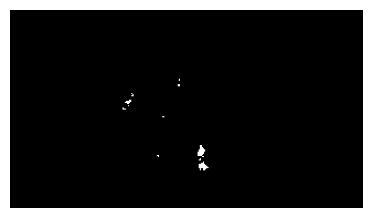

In [38]:
bckg = get_background_image_nframe('LabSession5Images/video.avi', 100, "median")

play_mask_and_image_bckg_sub('LabSession5Images/video.avi', bckg, distance=1, threshold=200)


## Exercise 4: Sobel Filter Frame-Wise

Apply the Sobel kernels to calculate the smooth derivates $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along x and y respectively. Visualize the absolute value of the two results.
Then, calculate the module of the gradient as $max(abs(\frac{dI(x, y)}{dx}), abs(\frac{dI(x, y)}{dy}))$. Do it for each frame of the video and visualize the results. Test it on "ex/1.avi".

In [39]:
# Write your solution here

def get_edges_sobels(img):
    sobel_ker = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])/4

    dIdx = cv2.filter2D(np.float32(img), -1, sobel_ker, (-1,-1))
    dIdy = cv2.filter2D(np.float32(img), -1, sobel_ker.T, (-1,-1))

    dIdx = np.sum(dIdx, axis=-1)
    dIdy = np.sum(dIdy, axis=-1)

    dIdx_module = np.abs(dIdx)
    dIdy_module = np.abs(dIdy)

    return np.maximum(dIdx_module, dIdy_module)


def play_video_edges(video_path):
    cap = cv2.VideoCapture(video_path)

    try:
        while(cap.isOpened()):
            ret, frame = cap.read()
            if ret and not frame is None:
                frame = get_edges_sobels(frame)
                plt.axis('off')
                plt.imshow(frame, cmap="gray", vmin=0, vmax=256)
                plt.show()
                clear_output(wait=True)
            else:
                cap.release()
                print("Released Video Resource because ret=False")
                # Break exit the while loops
                break

    except KeyboardInterrupt:
        # If we press stop (jupyter GUI) release the video
        cap.release()
        print("Released Video Resource")

play_video_edges('LabSession5Images/video.avi')

Released Video Resource


<Figure size 640x480 with 0 Axes>